# a notebook to figure out some plotting stuff
- for example, a strikezone view of the pitches when they cross the plate
- 3d trails if I can figure that out

In [1]:
from pybaseball import statcast
from pybaseball import playerid_reverse_lookup
from pybaseball import statcast_batter, spraychart

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# this defaults to yesterday
end_dt = '2022-06-12'

df = statcast(start_dt=end_dt, end_dt=end_dt)

print(df.shape)

This is a large query, it may take a moment to complete


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:17<00:00, 17.59s/it]

(4516, 92)


In [3]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
1844,FF,2022-06-12,100.7,-2.25,4.72,"Díaz, Edwin",435559,621242,strikeout,swinging_strike,...,4,4,1,1,4,Standard,Standard,234,-0.005,-0.07
1934,SL,2022-06-12,91.9,-2.22,4.86,"Díaz, Edwin",435559,621242,NaN,ball,...,4,4,1,1,4,Standard,Standard,202,0.0,0.011
1938,SL,2022-06-12,90.4,-2.23,5.06,"Díaz, Edwin",435559,621242,NaN,called_strike,...,4,4,1,1,4,Standard,Standard,231,0.0,-0.023
2002,SL,2022-06-12,91.1,-2.39,5.05,"Díaz, Edwin",435559,621242,NaN,foul,...,4,4,1,1,4,Standard,Standard,210,0.0,-0.017
2042,FF,2022-06-12,99.5,-2.21,4.79,"Díaz, Edwin",501571,621242,strikeout,called_strike,...,4,4,1,1,4,Standard,Standard,230,-0.012,-0.1


In [6]:
a_pitch = df.loc[1]

In [7]:
a_pitch

pitch_type                                FF
game_date                2022-06-12 00:00:00
release_speed                           96.8
release_pos_x                          -1.89
release_pos_z                           5.36
                                ...         
if_fielding_alignment               Standard
of_fielding_alignment               Standard
spin_axis                                230
delta_home_win_exp                       0.0
delta_run_exp                          0.045
Name: 1, Length: 92, dtype: object

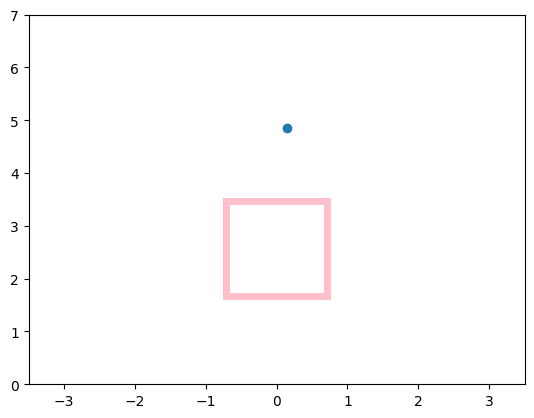

In [32]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#define Matplotlib figure and axis
fig, ax = plt.subplots()

#create simple line plot
ax.plot(a_pitch["plate_x"], a_pitch["plate_z"], 'o')

#add rectangle to plot
ax.add_patch(Rectangle((-0.71, a_pitch["sz_bot"]), 2*0.71, a_pitch["sz_top"] - a_pitch["sz_bot"],
             edgecolor = 'pink',
             facecolor = 'blue',
             fill=False,
             lw=5))


ax.set_xlim(-3.5, 3.5)
ax.set_ylim(0, 7)

#display plot
plt.show()

In [33]:
# Do this again, but for all pitches

all_pitches = df[df.pitcher == 621242]
# here is the game that he pitched in https://www.youtube.com/watch?v=r5-DFUnWevY

In [35]:
all_pitches

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
1844,FF,2022-06-12,100.7,-2.25,4.72,"Díaz, Edwin",435559,621242,strikeout,swinging_strike,...,4,4,1,1,4,Standard,Standard,234,-0.005,-0.07
1934,SL,2022-06-12,91.9,-2.22,4.86,"Díaz, Edwin",435559,621242,NaN,ball,...,4,4,1,1,4,Standard,Standard,202,0.0,0.011
1938,SL,2022-06-12,90.4,-2.23,5.06,"Díaz, Edwin",435559,621242,NaN,called_strike,...,4,4,1,1,4,Standard,Standard,231,0.0,-0.023
2002,SL,2022-06-12,91.1,-2.39,5.05,"Díaz, Edwin",435559,621242,NaN,foul,...,4,4,1,1,4,Standard,Standard,210,0.0,-0.017
2042,FF,2022-06-12,99.5,-2.21,4.79,"Díaz, Edwin",501571,621242,strikeout,called_strike,...,4,4,1,1,4,Standard,Standard,230,-0.012,-0.1
2137,FF,2022-06-12,99.1,-2.39,4.78,"Díaz, Edwin",501571,621242,NaN,foul,...,4,4,1,1,4,Standard,Standard,236,0.0,-0.031
2209,SL,2022-06-12,90.1,-2.39,5.08,"Díaz, Edwin",501571,621242,NaN,swinging_strike,...,4,4,1,1,4,Standard,Standard,228,0.0,-0.024
2251,SL,2022-06-12,92.0,-2.37,5.04,"Díaz, Edwin",622110,621242,strikeout,called_strike,...,4,4,1,1,4,Standard,Standard,213,-0.021,-0.299
2275,SL,2022-06-12,90.0,-2.39,5.14,"Díaz, Edwin",622110,621242,NaN,called_strike,...,4,4,1,1,4,Standard,Standard,199,0.0,-0.076
2412,FF,2022-06-12,97.3,-2.44,4.86,"Díaz, Edwin",622110,621242,NaN,called_strike,...,4,4,1,1,4,Standard,Standard,238,0.0,-0.076


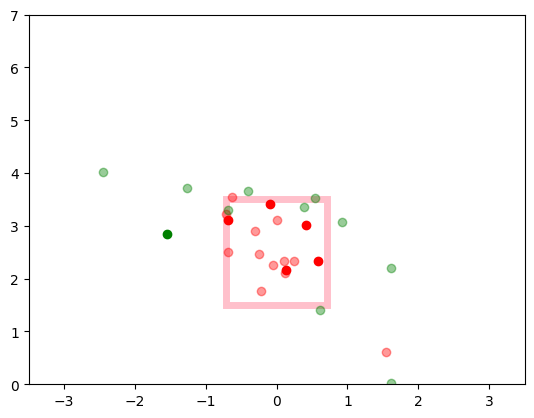

In [55]:
#define Matplotlib figure and axis
fig, ax = plt.subplots()



for row in all_pitches.iterrows():
    row = row[1]
    ax.plot(row["plate_x"],
            row["plate_z"],
            'o',
            alpha = 0.4 if pd.isna(row["events"]) else 1,
            color = "green" if row["description"] == "ball" else "red")

#add strike zone to plot
ax.add_patch(Rectangle((-0.71, 1.5), 2*0.71, 2,
             edgecolor = 'pink',
             facecolor = 'blue',
             fill=False,
             lw=5))

ax.set_xlim(-3.5, 3.5)
ax.set_ylim(0, 7)


plt.show()

## Quick things to make this better
- turn into a function
- different colors for different pitch types
- draw a plate?
- markers that show speed and type
- maybe movement with like a empty circle, vector, filled circle